In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [66]:
customers = pd.read_csv('Ecommerce_Customers1')

In [67]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [68]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


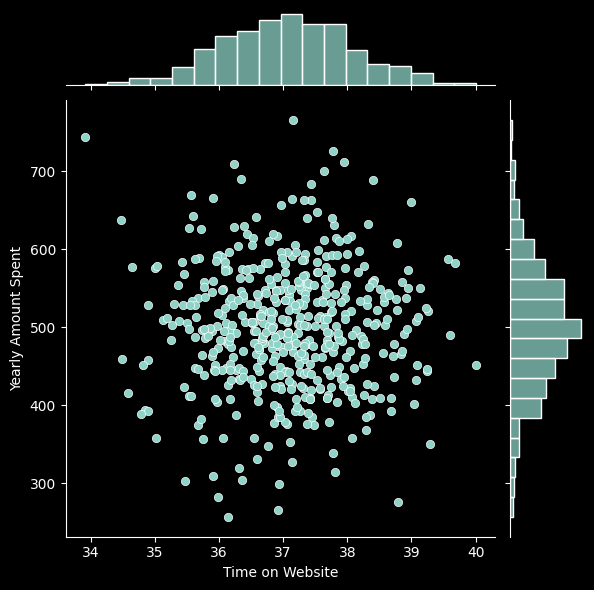

In [70]:
plt.style.use('dark_background')
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')
plt.show()

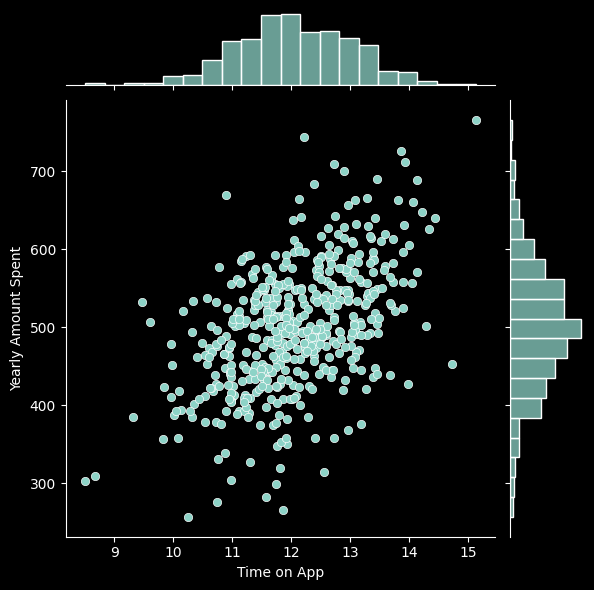

In [71]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

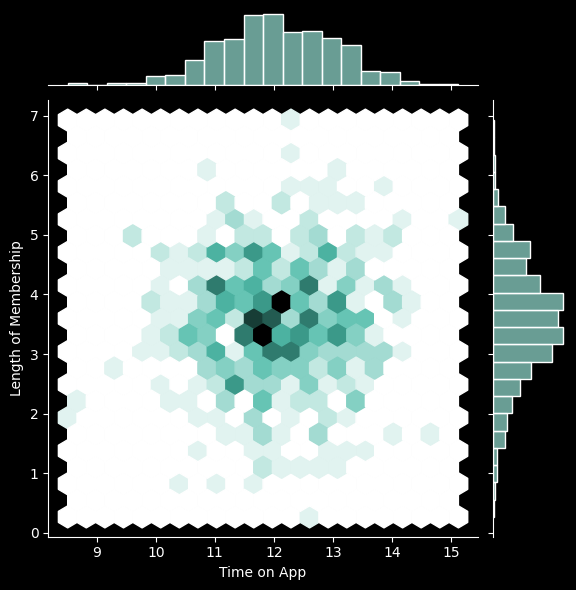

In [72]:
sns.jointplot(kind='hex', data=customers, x='Time on App', y='Length of Membership')

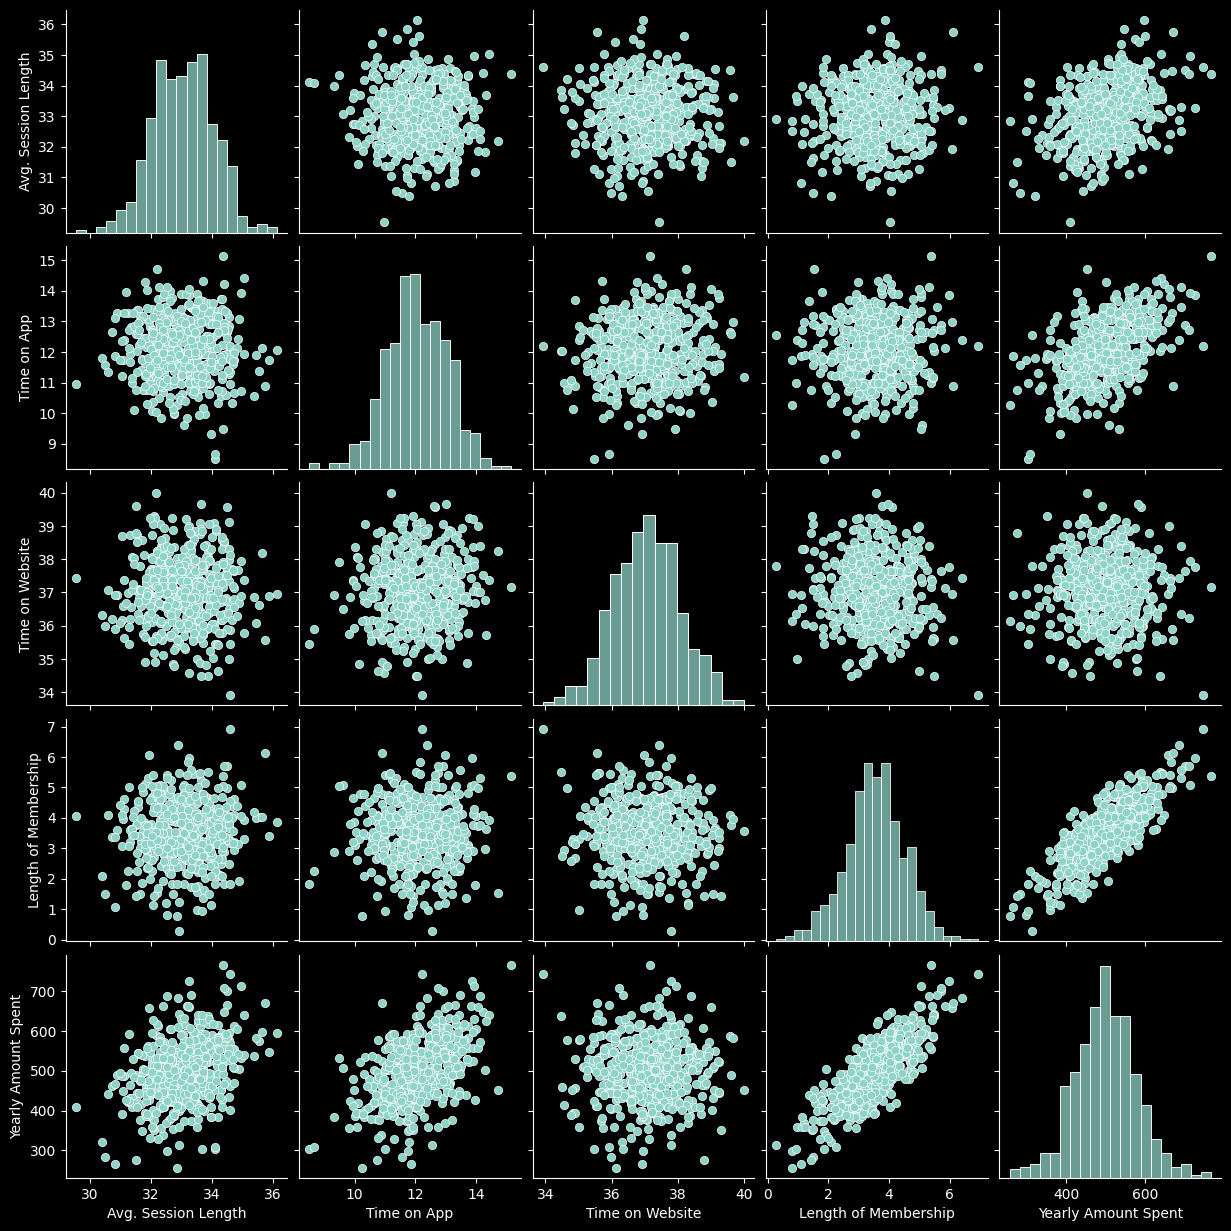

In [73]:
sns.pairplot(customers)

In [74]:
# Length of membership looks to be the most correlated feature with Yearly Amount Spent

<Axes: >

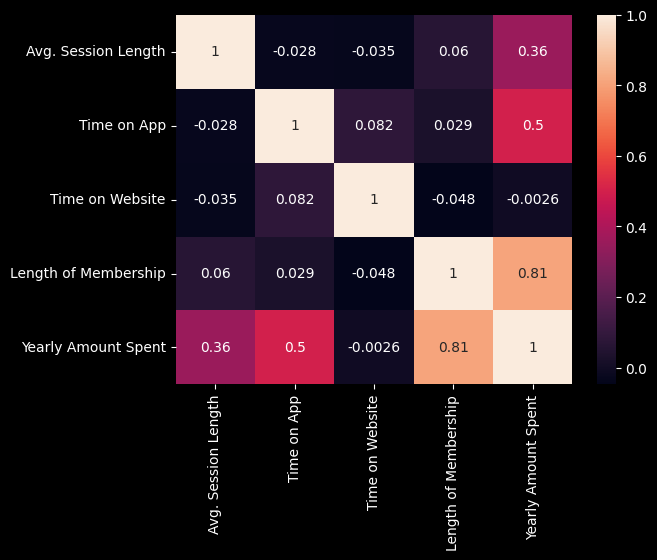

In [75]:
sns.heatmap(customers.select_dtypes(include='number').corr(), annot=True)

In [76]:
customers.select_dtypes(include='number').head(1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054


In [77]:
x = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [78]:
y = customers['Yearly Amount Spent']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(x_train, y_train)

LinearRegression()

In [84]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [85]:
prediction = lm.predict(x_test)

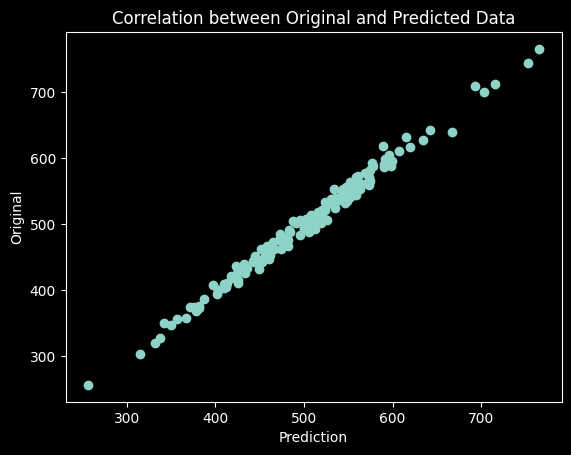

In [86]:
plt.scatter(prediction, y_test)
plt.xlabel('Prediction')
plt.ylabel('Original')
plt.title('Correlation between Original and Predicted Data')
plt.show()

In [87]:
from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE: 7.228148653430811
MSE: 79.81305165097385
RMSE: 8.9338150669786


Text(0.5, 1.0, 'Yearly Amount Spent Count')

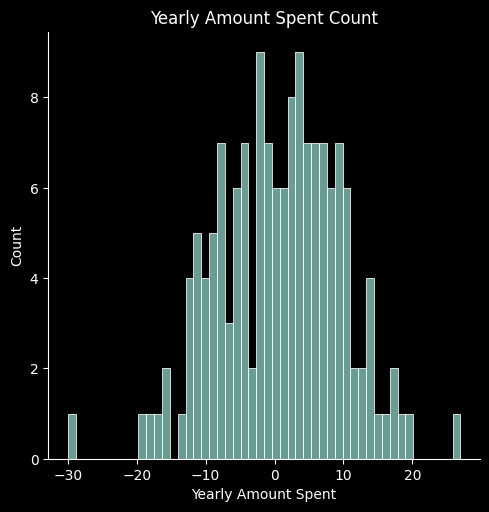

In [88]:
sns.displot((prediction-y_test),bins=50)
plt.title('Yearly Amount Spent Count')

In [89]:
# Do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea

In [90]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [91]:
"""

    Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

"""

'\n\n    Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.\n    Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.\n    Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.\n    Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.\n\n'

In [92]:
"""
there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, 
or develop the app more since that is what is working better. This sort of answer really depends on the other 
factors going on at the company, you would probably want to explore the relationship between Length of Membership 
and the App or the Website before coming to a conclusion!
"""

'\nthere are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, \nor develop the app more since that is what is working better. This sort of answer really depends on the other \nfactors going on at the company, you would probably want to explore the relationship between Length of Membership \nand the App or the Website before coming to a conclusion!\n'

In [93]:
import joblib

In [94]:
joblib.dump(lm, 'linear_modelled.pk1')

['linear_modelled.pk1']